# Flash Calculations:
### (Equations of State & PVT Analysis - Tarek Ahmed - Example 5.1 page 337)

A hydrocarbon mixture with the following overall composition is flashed in a separator at
50 psia and 100°F:

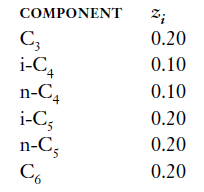

Assuming an ideal solution behavior, perform flash calculations.

In [1]:
import numpy as np
import pandas as pd

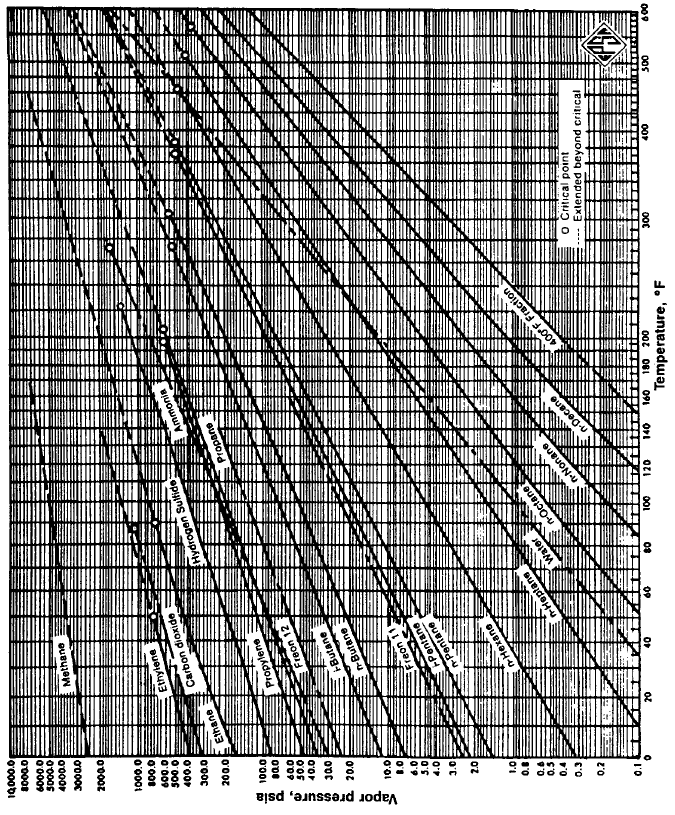

In [2]:
# Using Cox chart (shown above), get the vapour pressure values (Pvi) at T = 100 F:
P = 50 #psi
Comp = np.array(['C3','i-C4','n-C4','i-C5','n-C5','C6'])
zi = np.array([.2,.1,.1,.2,.2,.2])
Pvi = np.array([190,72.2,51.6,20.44,15.57,4.956])
ki = Pvi/P
df = pd.DataFrame({'Component i':Comp,'$z_i$':zi,'$P_{vi}$':Pvi,'$k_i$':ki})
df


,Component i,$z_i$,$P_{vi}$,$k_i$
0,C3,0.2,190.000,3.80000
1,i-C4,0.1,72.200,1.44400
2,n-C4,0.1,51.600,1.03200
3,i-C5,0.2,20.440,0.40880
4,n-C5,0.2,15.570,0.31140
5,C6,0.2,4.956,0.09912


Equations used:

Dalton's law:  $P_i=y_i P$

Raoult's law:  $P_i=x_i P_{vi}$

Newton-Raphson Iterations for estimating $n_v$:  $f(n_v)=\sum\limits_{i=0}^{n_c} \frac{z_i (k_i-1)}{n_v(k_i-1)+1}=0$

with Initial Guess: $n_v=\frac{A}{A+B}$

$A=\sum\limits_{i=0}^{n_c} z_i (k_i-1)$;    $B=\sum\limits_{i=0}^{n_c} z_i (\frac{1}{k_i}-1)$

$(n_v)_{i+1}=(n_v)_{i}-\frac{f(n_v)}{f'(n_v)}$

$f'(n_v)=-\sum\limits_{i=0}^{n_c} \frac{z_i (k_i-1)^2}{[n_v (k_i-1)+1]^2}=0$

$x_i=\frac{z_i}{n_L+n_vk_i};   y_i=x_ik_i=\frac{z_ik_i}{n_L+n_vk_i}$ 

In [3]:
A = sum([zi[j]*(ki[j]-1) for j in range(6)])
B = sum([zi[j]*(ki[j]-1)/ki[j] for j in range(6)])
nv = [A/(A-B)]   # initial guess
error_threshold = 10**-6

#Newton-Raphson
nv.append(nv[-1]-(sum([zi[j]*(ki[j]-1)/(nv[-1]*(ki[j]-1)+1) for j in range(6)])/-sum([zi[j]*((ki[j]-1)**2)/((nv[-1]*(ki[j]-1)+1)**2) for j in range(6)])))
while abs(nv[-1]-nv[-2])>error_threshold:
    nv.append(nv[-1]-(sum([zi[j]*(ki[j]-1)/(nv[-1]*(ki[j]-1)+1) for j in range(6)])/-sum([zi[j]*((ki[j]-1)**2)/((nv[-1]*(ki[j]-1)+1)**2) for j in range(6)])))
print('The iterations for total mole in vapour phase (nv):\n',nv)
nv = nv[-1]
nl = 1-nv
print('Mole fractions in vapour and liquid phases respectively:',nv,nl)
xi = [zi[j]/(nl+nv*ki[j]) for j in range(6)]
yi = [xi[j]*ki[j] for j in range(6)]
df['$x_i$']=xi
df['$y_i$']=yi
df

The iterations for total mole in vapour phase (nv):
 [0.0675187847059648, 0.10628012280248236, 0.10862987297405209, 0.10863683208326162, 0.10863683214351887]
Mole fractions in vapour and liquid phases respectively: 0.10863683214351887 0.8913631678564812


,Component i,$z_i$,$P_{vi}$,$k_i$,$x_i$,$y_i$
0,C3,0.2,190.000,3.80000,0.153353,0.582740
1,i-C4,0.1,72.200,1.44400,0.095398,0.137755
2,n-C4,0.1,51.600,1.03200,0.099654,0.102842
3,i-C5,0.2,20.440,0.40880,0.213727,0.087372
4,n-C5,0.2,15.570,0.31140,0.216171,0.067316
5,C6,0.2,4.956,0.09912,0.221697,0.021975


In [4]:
#Newton's method for system of non-linear equations using jacobian
nc = 3
Pvi = np.array([40,10,3])
zi = np.array([.05,.45,.5])
error = 10**-6
X = np.array([[.5,8]])
X = np.append(X,[(X[-1]-np.dot(np.linalg.inv(np.array([[-sum([zi[j]*((Pvi[j]/X[-1][1])-1)/((X[-1][0]*((Pvi[j]/X[-1][1])-1)+1)**2) for j in range(nc)]),sum([zi[j]*(X[-1][0])*(Pvi[j]/(X[-1][1]**2))/((X[-1][0]*((Pvi[j]/X[-1][1])-1)+1)**2) for j in range(nc)])],[-sum([zi[j]*(Pvi[j]/X[-1][1])*((Pvi[j]/X[-1][1])-1)/((X[-1][0]*((Pvi[j]/X[-1][1])-1)+1)**2) for j in range(nc)]),-sum([zi[j]*((1-X[-1][0])/Pvi[j])/(((1-X[-1][0])*(X[-1][1]/Pvi[j])+X[-1][0])**2) for j in range(nc)])]])),np.array([sum([zi[j]/(X[-1][0]*((Pvi[j]/X[-1][1])-1)+1) for j in range(nc)])-1,sum([zi[j]*(Pvi[j]/X[-1][1])/(X[-1][0]*((Pvi[j]/X[-1][1])-1)+1) for j in range(nc)])-1])))],axis=0)
while abs(X[-1][0]-X[-2][0])>error or abs(X[-1][1]-X[-2][1])>error:
    X = np.append(X,[(X[-1]-np.dot(np.linalg.inv(np.array([[-sum([zi[j]*((Pvi[j]/X[-1][1])-1)/((X[-1][0]*((Pvi[j]/X[-1][1])-1)+1)**2) for j in range(nc)]),sum([zi[j]*(X[-1][0])*(Pvi[j]/(X[-1][1]**2))/((X[-1][0]*((Pvi[j]/X[-1][1])-1)+1)**2) for j in range(nc)])],[-sum([zi[j]*(Pvi[j]/X[-1][1])*((Pvi[j]/X[-1][1])-1)/((X[-1][0]*((Pvi[j]/X[-1][1])-1)+1)**2) for j in range(nc)]),-sum([zi[j]*((1-X[-1][0])/Pvi[j])/(((1-X[-1][0])*(X[-1][1]/Pvi[j])+X[-1][0])**2) for j in range(nc)])]])),np.array([sum([zi[j]/(X[-1][0]*((Pvi[j]/X[-1][1])-1)+1) for j in range(nc)])-1,sum([zi[j]*(Pvi[j]/X[-1][1])/(X[-1][0]*((Pvi[j]/X[-1][1])-1)+1) for j in range(nc)])-1])))],axis=0)
print('The iterations for total mole in vapour phase (nv) and total vapour pressure (P):\n',X,'\n')
X = X[-1]
nl = 1-X[0]
print('Final equilibrium pressure (in bar):',X[1],'\nMole fractions in vapour and liquid phases:',X[0],nl)
ki = [Pvi[j]/X[1] for j in range(nc)]
print('Equilibrium Ratios for each gases(Ki):',ki,'\n')
xi = [zi[j]/(nl+X[0]*ki[j]) for j in range(nc)]
yi = [xi[j]*ki[j] for j in range(nc)]
print('Mole fractions of components in liquid phase',xi)
print('Mole fractions of components in vapour phase',yi)

The iterations for total mole in vapour phase (nv) and total vapour pressure (P):
 [[0.5        8.        ]
 [0.5        5.34953765]
 [0.5        5.75640734]
 [0.5        5.77221711]
 [0.5        5.77223916]
 [0.49999158 5.77226324]
 [0.49998947 5.77226929]
 [0.49987904 5.77258514]
 [0.49987905 5.77258515]] 

Final equilibrium pressure (in bar): 5.772585146223104 
Mole fractions in vapour and liquid phases: 0.4998790487715892 0.5001209512284108
Equilibrium Ratios for each gases(Ki): [6.92930446009467, 1.7323261150236675, 0.5196978345071003] 

Mole fractions of components in liquid phase [0.012613728296323668, 0.32941102846558973, 0.6579752432380868]
Mole fractions of components in vapour phase [0.08740436374213793, 0.5706473271877458, 0.34194830907011625]


### Actually, above method fails to estimate $n_v$ and P for given temperature and composition, and requires system pressure P for flash calculations, as on experimenting by taking arbitrary initial guess for $n_v$ or P, the iterations converge around the Initial Guess only.